### **Part-B Guessing the mystery label**

#### **Multi Layer Perceptron**

In [1]:
dataset_train_path = "../dataset/fashionmnist-datafiles/x_train.csv"
dataset_test_path = "../dataset/fashionmnist-datafiles/x_test.csv"
dataset_label_train_path = "../dataset/fashionmnist-datafiles/y_train.csv"
dataset_label_test_path = "../dataset/fashionmnist-datafiles/y_test.csv"

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from datetime import datetime
import os
from scipy.stats import zscore


def train_and_return_mlp(iter=10, result_path="./mlp"):
    formatted_time = datetime.now().strftime("%m-%d-%H-%M")
    name = f"mlp-{iter}-{formatted_time}"
    result_folder = os.path.join(result_path, name)
    os.makedirs(result_folder, exist_ok=True)
    x_train = np.array(pd.read_csv(dataset_train_path).values)
    y_train = np.array(pd.read_csv(dataset_label_train_path).values.flatten())
    x_test = np.array(pd.read_csv(dataset_test_path).values)
    y_test = np.array(pd.read_csv(dataset_label_test_path).values.flatten())

    x_train = zscore(x_train, axis=0)
    x_test = zscore(x_test, axis=0)

    # Create a neural network with 3 hidden layers
    # First hidden layer: 10 neurons, second hidden layer: 5 neurons, third hidden layer: 3 neurons
    model = MLPClassifier(hidden_layer_sizes=(256, 128, 64), max_iter=iter, random_state=42)

    # Train the model on the training data
    start_time = datetime.now()
    model.fit(x_train, y_train)
    total_training_time = datetime.now() - start_time

    # Predict on the test set
    y_pred = model.predict(x_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    # Add titles and labels
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.savefig(os.path.join(result_folder, "confusion_matrix.png"))
    # Show the plot
    plt.show()

    cm = confusion_matrix(y_test, y_pred)
    num_classes = cm.shape[0]
    accuracy = []
    precision = []
    recall = []
    f1_score = []
    # Calculate metrics for each class
    for i in range(num_classes):
        TP = cm[i, i]  # True positive
        FP = cm[:, i].sum() - TP  # False positive
        FN = cm[i, :].sum() - TP  # False negative
        TN = cm.sum() - (TP + FP + FN)  # True negative

        # Accuracy is the overall proportion of correct predictions
        acc = (TP + TN) / cm.sum()

        # Precision: TP / (TP + FP)
        if (TP + FP) == 0:
            prec = 0
        else:
            prec = TP / (TP + FP)

        # Recall: TP / (TP + FN)
        if (TP + FN) == 0:
            rec = 0
        else:
            rec = TP / (TP + FN)

        # F1-Score: 2 * (Precision * Recall) / (Precision + Recall)
        if (prec + rec) == 0:
            f1 = 0
        else:
            f1 = 2 * (prec * rec) / (prec + rec)

        # Append the metrics to the lists
        accuracy.append(acc)
        precision.append(prec)
        recall.append(rec)
        f1_score.append(f1)

    # Create a DataFrame to display the metrics for each class
    metrics_df = pd.DataFrame({
        'Class': np.arange(num_classes),
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score,
        'Total Training Time': total_training_time
    })
    metrics_csv_path = os.path.join(result_folder, "metrics.csv")
    metrics_df.to_csv(metrics_csv_path, index=False)
    return model, metrics_df

#### **Iterations 10 | Hidden layers : 3 | 256, 128, 64**

c:\Users\DELL\Desktop\Conestoga\AIML\AIMaths-FinalProject\venv\tensorflow_cpu\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 91.16%


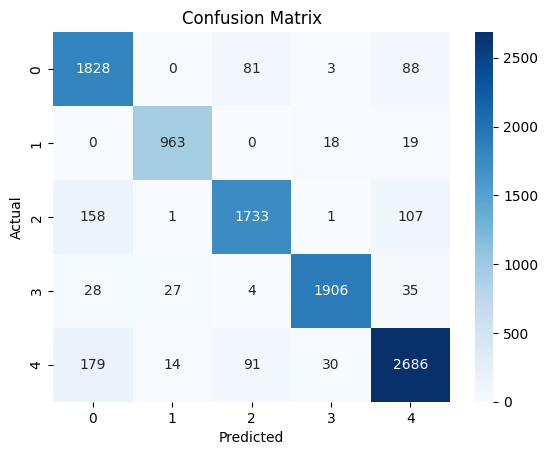

,Class,Accuracy,Precision,Recall,F1-Score,Total Training Time
0,0,0.9463,0.833561,0.914000,0.871929,0 days 00:01:10.605556
1,1,0.9921,0.958209,0.963000,0.960599,0 days 00:01:10.605556
2,2,0.9557,0.907805,0.866500,0.886672,0 days 00:01:10.605556
3,3,0.9854,0.973442,0.953000,0.963113,0 days 00:01:10.605556
4,4,0.9437,0.915162,0.895333,0.905139,0 days 00:01:10.605556


In [36]:
trained_model, results_df = train_and_return_mlp(10)
display(results_df)

- With just 10 iterations with multi layer perceptron we reached ~91% accuracy overall 
- When compared with ensemble techniques this is a visible improvement.
- We can try with more iterations.
- Took around 70 seconds for training

c:\Users\DELL\Desktop\Conestoga\AIML\AIMaths-FinalProject\venv\tensorflow_cpu\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 92.28%


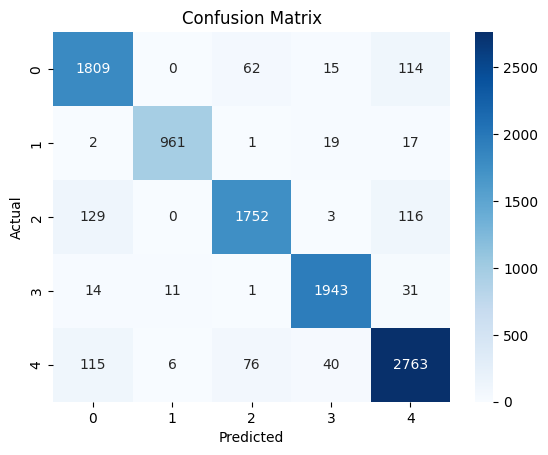

,Class,Accuracy,Precision,Recall,F1-Score,Total Training Time
0,0,0.9549,0.874335,0.9045,0.889162,0 days 00:04:40.771299
1,1,0.9944,0.982618,0.9610,0.971689,0 days 00:04:40.771299
2,2,0.9612,0.926004,0.8760,0.900308,0 days 00:04:40.771299
3,3,0.9866,0.961881,0.9715,0.966667,0 days 00:04:40.771299
4,4,0.9485,0.908583,0.9210,0.914749,0 days 00:04:40.771299


In [37]:
trained_model, results_df = train_and_return_mlp(50)
display(results_df)

- We received a very good improvement in accuracy 
- From ~85 percent to ~92% ( ensemble decision tree model )
- The training time taken increased from ~32 seconds from boosting dtree model to ~5minutes. 


#### **Generate Embeddings from last layer**

- We will be using the last trained model trained with 92% accuracy with 50 iterations.
- Also note that classes 1 and 3 has very high accuracy almost close to perfection. This will be helpful when we try to dig the mystery label.

In [44]:
def get_hidden_layer_activations(model, X, layer_index):
    """Calculate the activations of a specified hidden layer.
    
    Parameters:
    - model: Trained instance of sklearn.neural_network.MLPClassifier.
    - X: Input data, numpy array of shape (n_samples, n_features).
    - layer_index: Index of the hidden layer for which to compute activations.
    
    Returns:
    - Activations of the specified hidden layer, numpy array of shape (n_samples, n_units_in_layer).
    """
    if layer_index < 0 or layer_index >= len(model.coefs_) - 1:
        raise ValueError("Invalid layer_index.")
    
    # Forward propagate through the network until the specified layer
    activations = X
    for i in range(layer_index + 1):
        activations = np.dot(activations, model.coefs_[i]) + model.intercepts_[i]
        if i < len(model.coefs_) - 1: 
            activations = np.maximum(0, activations)
    
    return activations

mlp = trained_model
i = len(mlp.hidden_layer_sizes)-1
data = np.array(pd.read_csv(dataset_test_path).values)
# Retrieve activations for the ith hidden layer
embeddings = get_hidden_layer_activations(mlp, data, i)
display(embeddings.shape)

(10000, 64)

- We generated embeddings for all the 10000 test images. The features are now captured or squashed into 64 by the MLP.
- Now we can further use PCA to capture variance and further reduce the features.

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from matplotlib.cm import ScalarMappable


def perform_pca_lda(embeddings, labels):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(embeddings, labels)

    # 2. Perform LDA
    lda = LDA(n_components=2)
    X_lda = lda.fit_transform(embeddings, labels)

    # Define a colormap
    colormap = plt.cm.tab10
    norm = plt.Normalize(vmin=min(labels), vmax=max(labels))
    sm = ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])

    # 3. Plotting the results
    plt.figure(figsize=(12, 6))

    # PCA Plot
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="tab10", s=20, alpha=0.7)
    #scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)
    plt.title("PCA - 2 Components")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(sm, label="Class")
    plt.legend(title="Class")


    # LDA Plot
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=labels, palette="tab10", s=20, alpha=0.7)
    #scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)
    plt.title("LDA - 2 Components")
    plt.xlabel("LDA Component 1")
    plt.ylabel("LDA Component 2")
    plt.colorbar(sm, label="Class")
    plt.legend(title="Class")

    plt.tight_layout()
    plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_23848\1861361488.py:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Class")
C:\Users\DELL\AppData\Local\Temp\ipykernel_23848\1861361488.py:43: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Class")


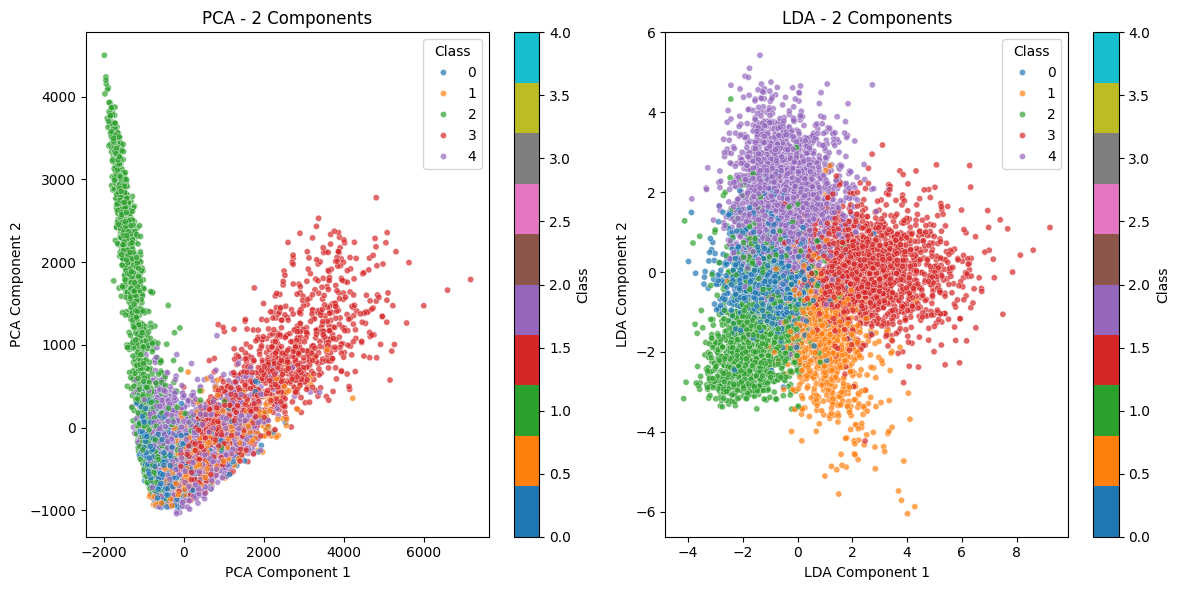

In [46]:
y_test = np.array(pd.read_csv(dataset_label_test_path).values.flatten())
perform_pca_lda(embeddings, y_test)

- We didnt normalize the test datasets before passing through the model for generating embeddings. 
- Lets do one more plot with zcore aplied to the test like we did while training.

In [47]:
mlp = trained_model
i = len(mlp.hidden_layer_sizes)-1
data = zscore(np.array(pd.read_csv(dataset_test_path).values), axis=0)
# Retrieve activations for the ith hidden layer
embeddings = get_hidden_layer_activations(mlp, data, i)
display(embeddings.shape)

(10000, 64)

C:\Users\DELL\AppData\Local\Temp\ipykernel_23848\1861361488.py:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Class")
C:\Users\DELL\AppData\Local\Temp\ipykernel_23848\1861361488.py:43: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Class")


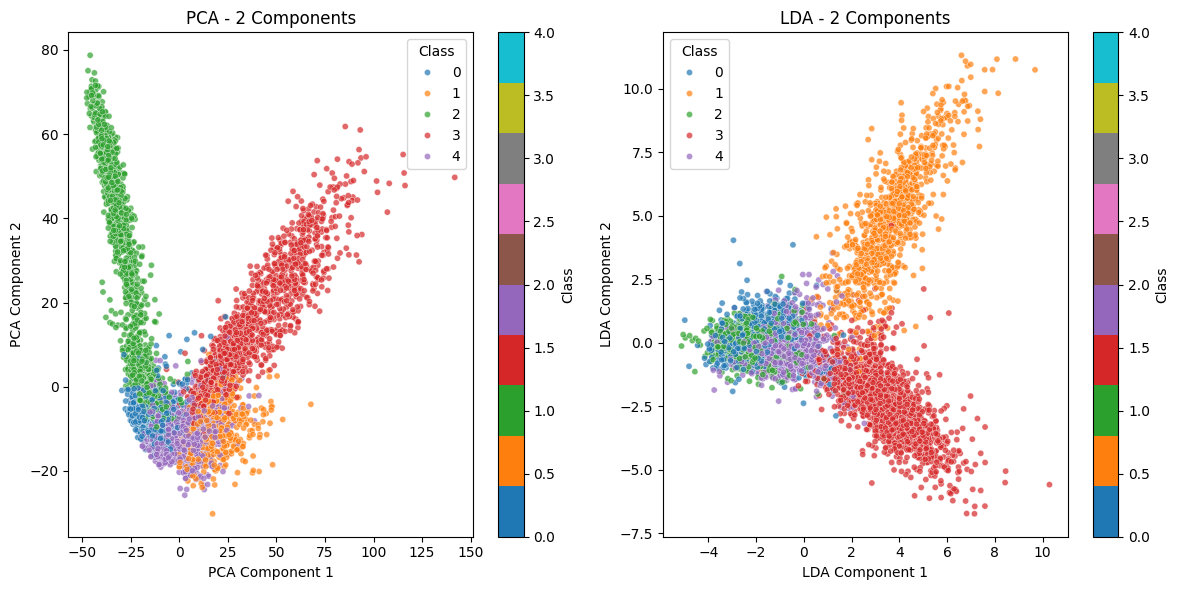

In [50]:
y_test = np.array(pd.read_csv(dataset_label_test_path).values.flatten())
perform_pca_lda(embeddings, y_test)

- What we can infer from the PCA 
- Class 2 will have PCA1 less than 0 and PCA2 greater than 0
- If PCA2 is greater than 0 and PCA1 is greater than 1 its ighly likely that the class is 3

- What we can infer from the LDA
- If LDA1 is greater than 2 and LDA2 is greater than 2 its highly likely its class 1
- If LDA1 is greater than 2 and LDA2 is less than 0 its highly likely that it represents class 3

Using this info also we can try dig out the images for atleast 3 classes and see it there is a pattern. We will do that in the end.

#### **Perform K-Means Clustering**

c:\Users\DELL\Desktop\Conestoga\AIML\AIMaths-FinalProject\venv\tensorflow_cpu\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\DELL\AppData\Local\Temp\ipykernel_23848\1861361488.py:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Class")
C:\Users\DELL\AppData\Local\Temp\ipykernel_23848\1861361488.py:43: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to

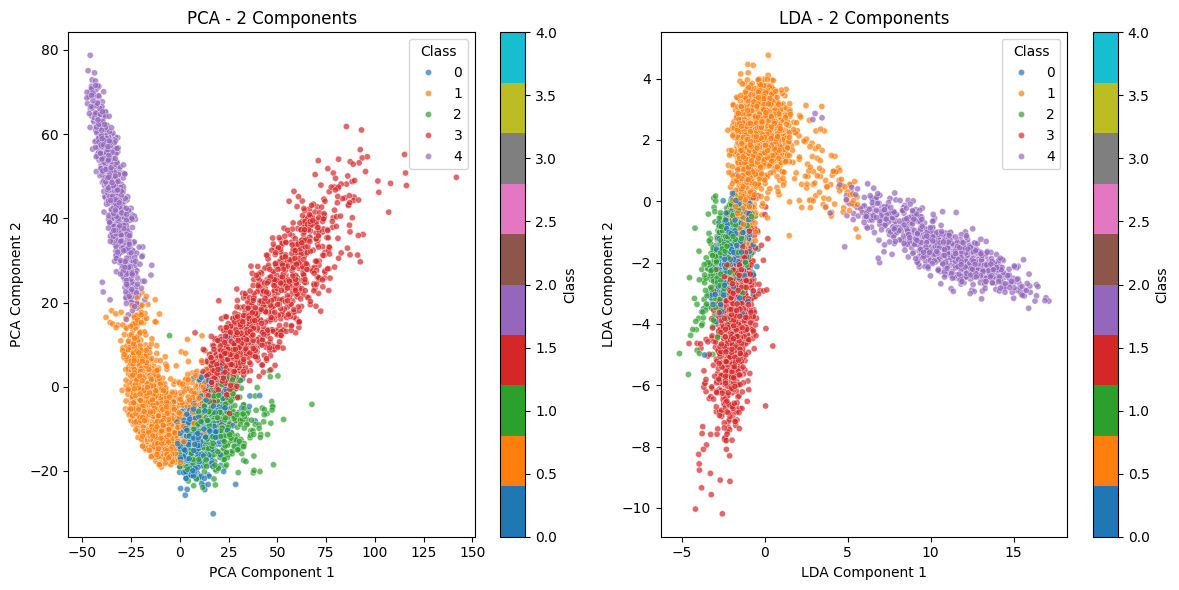

In [51]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(embeddings)
labels_from_kmeans = kmeans.labels_
#note that inctead of using the y_test labels we are now using the labels generated by the kmeans clustering
perform_pca_lda(embeddings, labels_from_kmeans)

- We can see that the PCA graph is almost matching with that generated with the help of actual labels. 
- To uncover the mystery label we can use either of the plots.

LDA component plot has a V shape in both but the alignment has changed. I am unable to find a reasoning for this. I understand that the labels can be assigned differently but why the plot is changing placement while maintaining relative distribution is something I have to find out. 

- To continue on it we can actually use the inference we arrived earlier with PCA. Similar inference we can draw from Kmeans based clustering. 

- If PCA1 Less than -25 and PCA2 greater than 20 it can be class 4 assigned by kmeans ( It may or may not be the same class assigned in the labels )
- If PCA1 less than -10 and PCA2 less than 20 it can be  Class 1
- If PCA1 greater than 50 it can be class 3
- The next two are ambigous and thin inferences. But still we can try it.
- If PCA1 greater than 25 and PCA2 less than 0 then it can be Class 2

#### **Trying to predict the classes printing a single image from actual class before finding based on printing n number of images from cluster**

In [97]:
x_train = np.array(pd.read_csv(dataset_train_path).values)
y_train = np.array(pd.read_csv(dataset_label_train_path).values.flatten())
x_test = np.array(pd.read_csv(dataset_test_path).values)
y_test = np.array(pd.read_csv(dataset_label_test_path).values.flatten())

unique_counts = pd.DataFrame(np.unique(labels_from_kmeans, return_counts=True)).T
unique_counts.columns = ['KMeans', 'Count']
unique_counts_actual = pd.DataFrame(np.unique(y_train, return_counts=True)).T
unique_counts_actual.columns = ['Actual', 'Count']
display(unique_counts_actual.sort_values(by='Count', ascending=False))
display(unique_counts.sort_values(by='Count', ascending=False))


,Actual,Count
4,4,18000
0,0,12000
2,2,12000
3,3,12000
1,1,6000


,KMeans,Count
1,1,5375
3,3,1693
0,0,1142
2,2,920
4,4,870


In [89]:
import matplotlib.pyplot as plt
import os
import random




def plot_image(x_test, y_test, n=10):
    unique_labels = set(y_test)  # Get unique labels from y_test
    plt.figure(figsize=(15, len(unique_labels) * 3))  # Adjust the figure size based on the number of unique labels
    
    # Loop through each unique label
    for i, label in enumerate(unique_labels):
        # Find the indices of all images with the current label
        label_indices = [idx for idx, val in enumerate(y_test) if val == label]
        
        # Randomly select n images (or fewer if there aren't enough)
        selected_indices = random.sample(label_indices, min(n, len(label_indices)))
        
        # Loop to plot n randomly selected images per label
        for j, idx in enumerate(selected_indices):
            plt.subplot(len(unique_labels), n, i * n + j + 1)  # n images per row
            plt.imshow(x_test[idx].reshape(28, 28), cmap="gray")
            plt.title(f"Label: {y_test[idx]}")
            plt.axis("off")
    
    plt.tight_layout()
    plt.show()

#### **Printing images with labels created by kmeans Clustering**

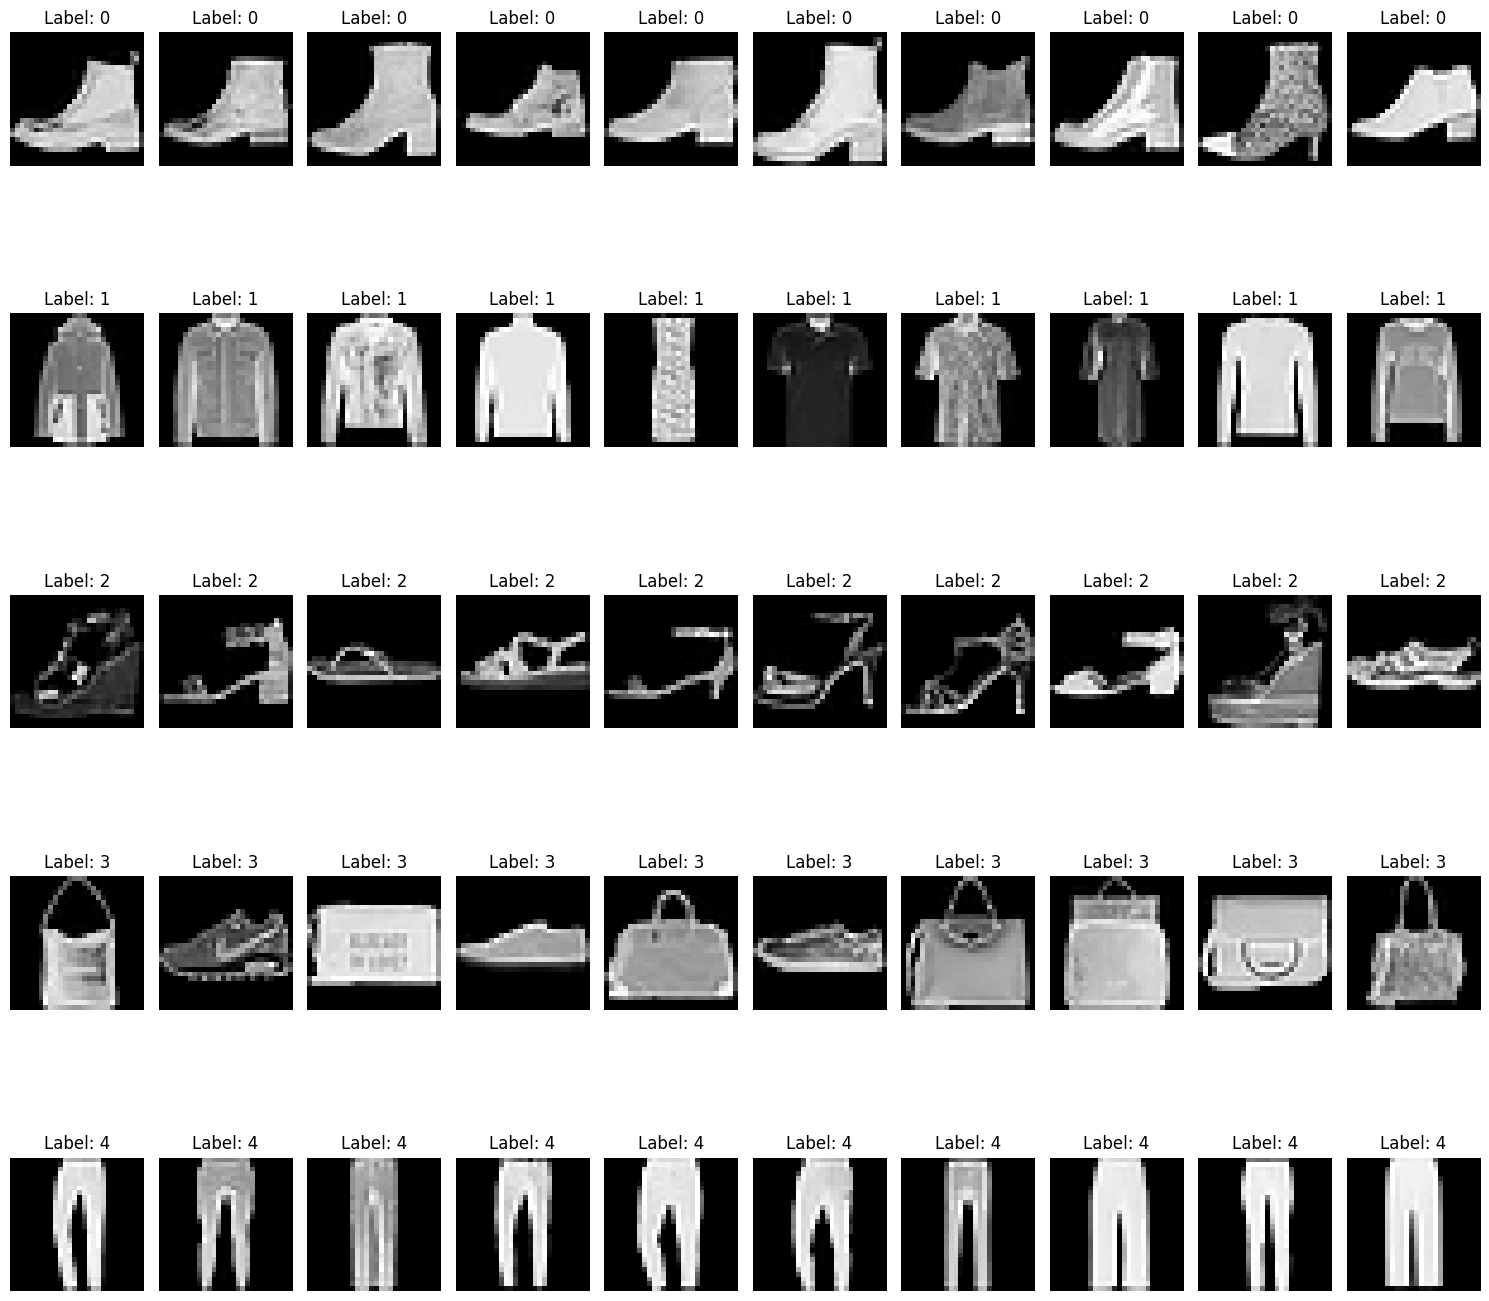

In [96]:
plot_image(x_test=x_test, y_test=labels_from_kmeans, n=10)

##### **Match the Class labels from actual labels and cluster labels using PCA plot**

In [107]:
def perform_pca_on_both(embeddings, actualLabel, clusterLabel):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(embeddings, actualLabel)

    # 2. Perform LDA
    pca2 = PCA(n_components=2)
    X_pca2 = pca.fit_transform(embeddings, clusterLabel)

    # Define a colormap
    colormap = plt.cm.tab10
    norm = plt.Normalize(vmin=min(actualLabel), vmax=max(actualLabel))
    sm = ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array([])

    # Define a colormap
    colormap2 = plt.cm.tab10
    norm2 = plt.Normalize(vmin=min(clusterLabel), vmax=max(clusterLabel))
    sm2 = ScalarMappable(cmap=colormap2, norm=norm2)
    sm2.set_array([])

    # 3. Plotting the results
    plt.figure(figsize=(12, 6))

    # PCA Plot
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=actualLabel, palette="tab10", s=20, alpha=0.7)
    #scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)
    plt.title("PCA - Actual Labels")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(sm, label="Class")
    plt.legend(title="Class")


    # LDA Plot
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=X_pca2[:, 0], y=X_pca2[:, 1], hue=clusterLabel, palette="tab10", s=20, alpha=0.7)
    #scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=labels, cmap='viridis', s=10, alpha=0.7)
    plt.title("PCA Cluster Labels")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.colorbar(sm2, label="Class")
    plt.legend(title="Class")

    plt.tight_layout()
    plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_23848\2630453320.py:31: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Class")
C:\Users\DELL\AppData\Local\Temp\ipykernel_23848\2630453320.py:42: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm2, label="Class")


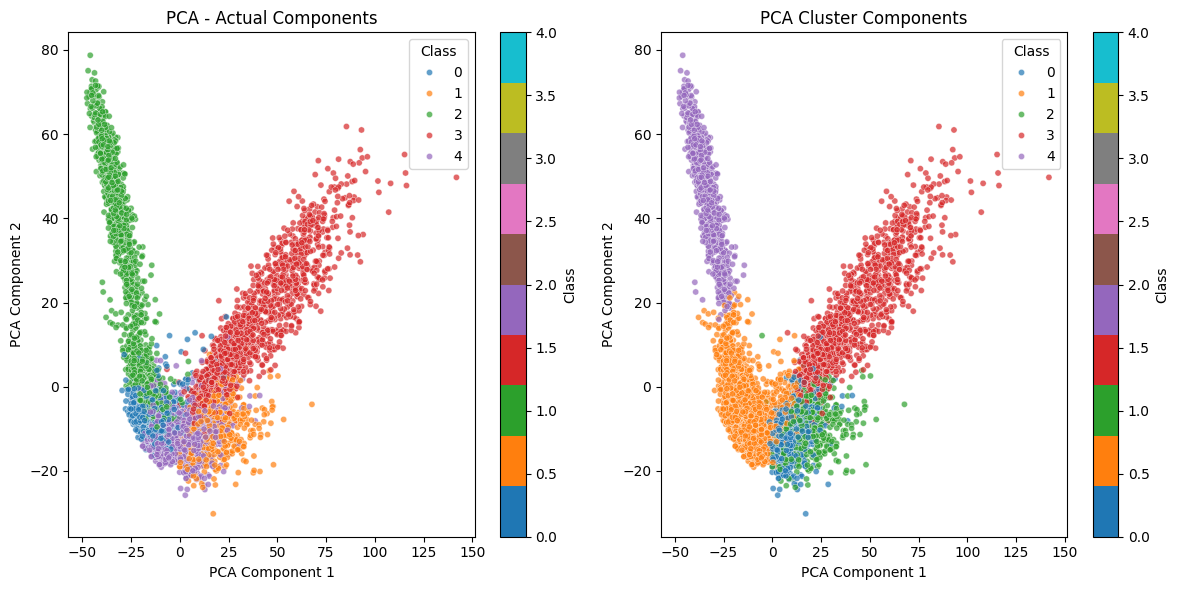

In [103]:
perform_pca_on_both(embeddings, y_test, labels_from_kmeans)

In [105]:
df = pd.DataFrame({
    "Actual Label": [2, 3, 0, 4, 1],  # List of actual labels
    "Cluster Label": [4, 3, 1, 0, 2]  # Corresponding cluster labels
})
display(df)

,Actual Label,Cluster Label
0,2,4
1,3,3
2,0,1
3,4,0
4,1,2


##### **Actual Label 0 = TopWear**
##### **Actual Label 1 = Chappal/Sandal**
##### **Actual Label 2 = BottomWear**
##### **Actual Label 3 = Accessories**
##### **Actual Label 4 = Boots/Shoes**

#### **Some Doubts**

- I actually plotted some train and test images also and saw that there were some mixed images in classes.
- Saw that the clustering was giving better results than the actual test images. ( like in label 2 I can see both topwear and bottomwear)
- So I am confused about the reason behind this.

- And if this is indeed the correct reasoning, does the better clustering using kmeans mean that the MLP was actually generating the embedding correctly. ie in reality the error rate that the perceptron showed was in fact because it was classifying correctly and the given test labelling had some wrong labels ? 

Example is given below

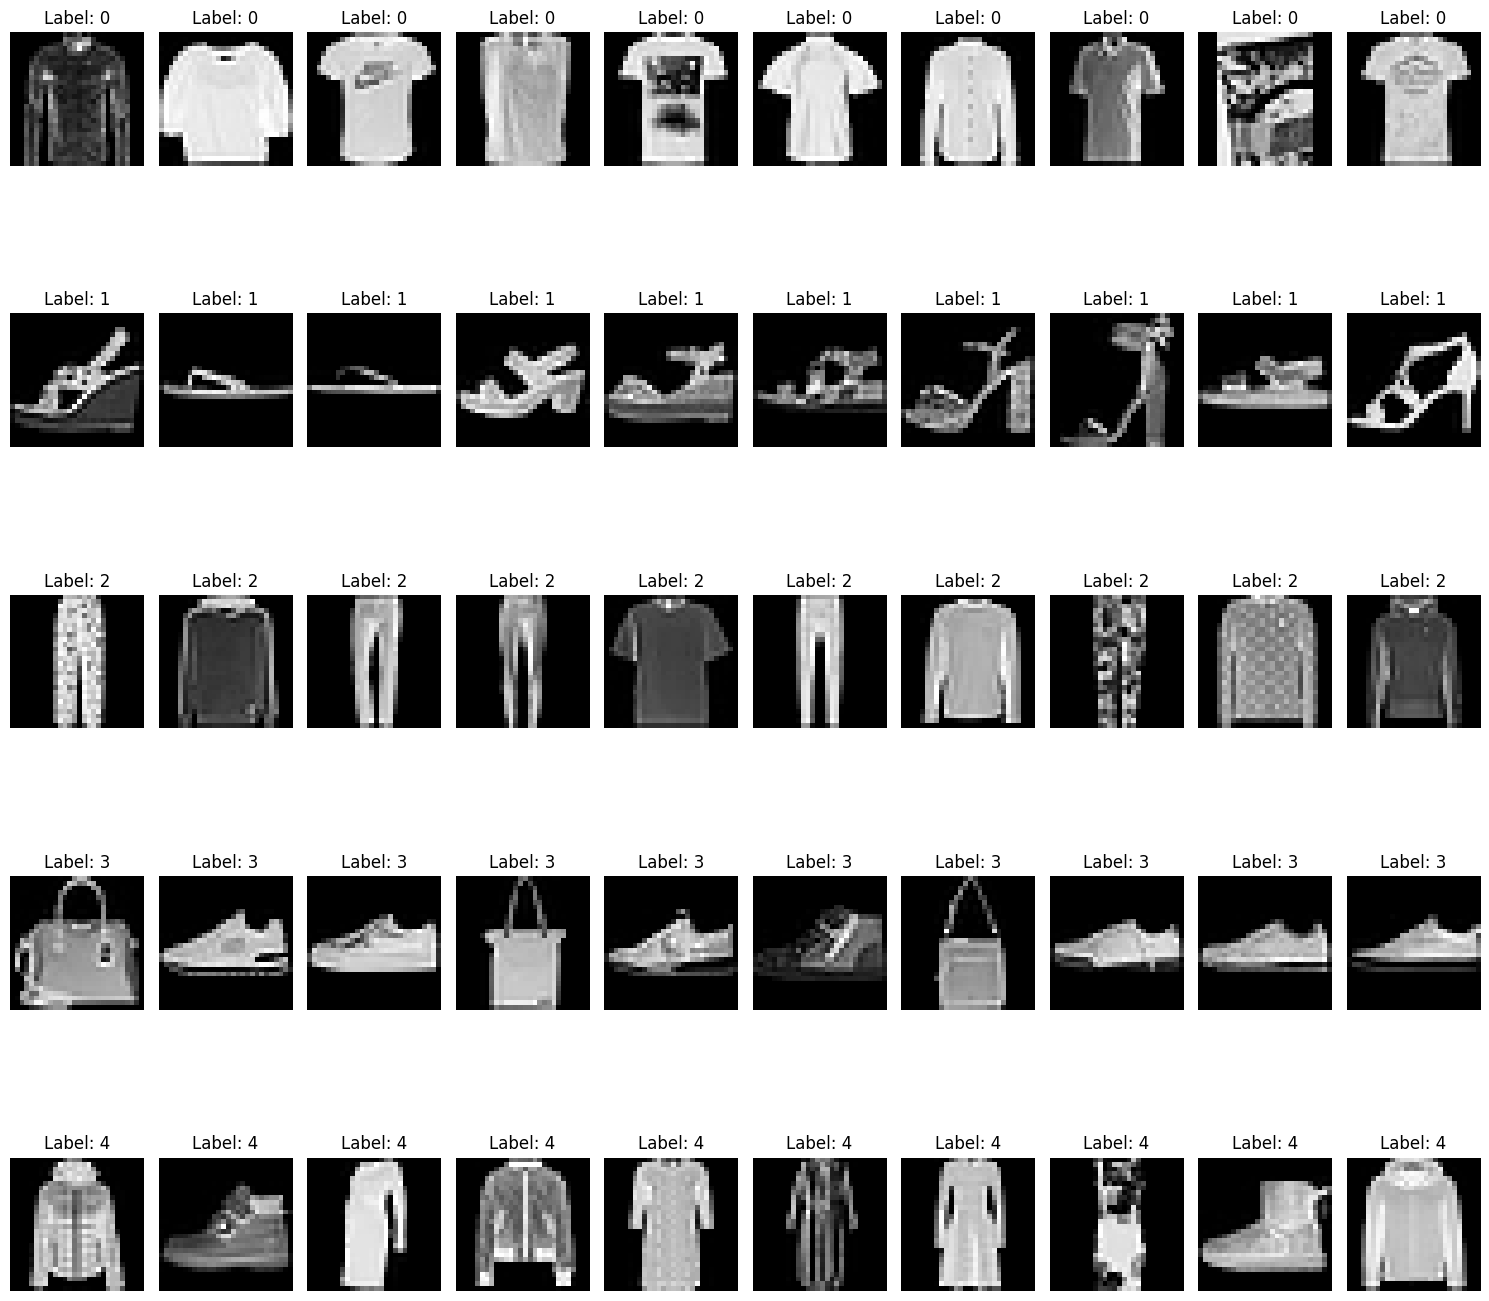

In [106]:
#note that the label used is ytest and not the labels generated from kmeans.
plot_image(x_test=x_test, y_test=y_test, n=10)